In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Train.csv")
print("Average Cost:", df['Cost_of_the_Product'].mean())
print("Maximum Product Cost:", df['Cost_of_the_Product'].max())
print("Minimum Product Cost:", df['Cost_of_the_Product'].min())

Average Cost: 210.19683607600692
Maximum Product Cost: 310
Minimum Product Cost: 96


In [2]:
df['Cost_of_the_Product'].value_counts().head()
df['Weight_in_gms'].iloc[0:20]
df['Reached.on.Time_Y.N'].unique()
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [3]:
avg_cost = df['Cost_of_the_Product'].mean()
high_cost = df[df['Cost_of_the_Product'] > avg_cost]
low_cost_shipments = df[df['Cost_of_the_Product'] < avg_cost]
print(f"Number of high Cost Shipments (>{avg_cost:.2f}): {len(high_cost)}")
print(f"Number of low cost shipments (<{avg_cost:.2f}): {len(low_cost_shipments)}")

Number of high Cost Shipments (>210.20): 5714
Number of low cost shipments (<210.20): 5285


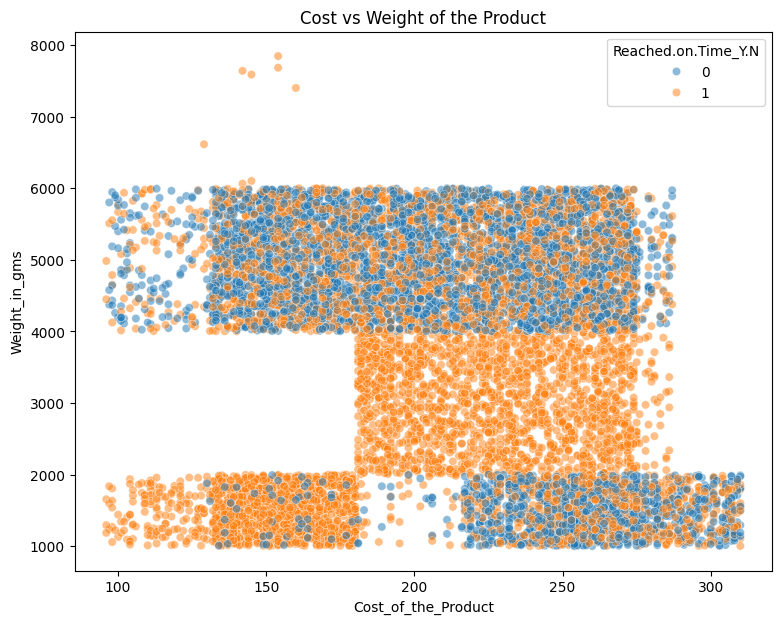

In [4]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Cost_of_the_Product',
                y='Weight_in_gms',
                hue='Reached.on.Time_Y.N',
                data=df,
                alpha=0.5)
plt.title("Cost vs Weight of the Product")
plt.show()


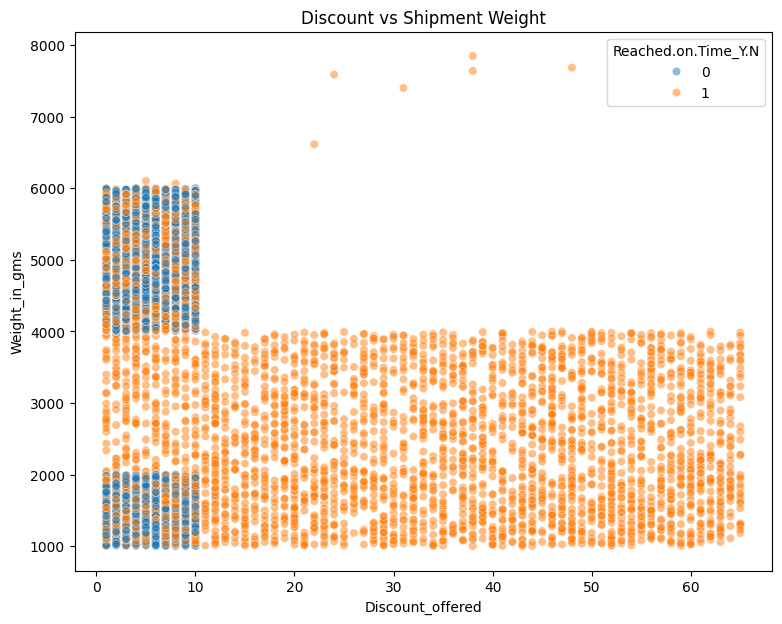

In [5]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Discount_offered',
                y='Weight_in_gms',
                hue='Reached.on.Time_Y.N',
                data=df,
                alpha=0.5)
plt.title("Discount vs Shipment Weight")
plt.show()

In [6]:
pivot1 = df.pivot_table(values='Customer_rating',
                        index='Warehouse_block',
                        columns='Mode_of_Shipment',
                        aggfunc='mean')

print("Pivot Table: Average Customer Rating")
display(pivot1)

Pivot Table: Average Customer Rating


Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,3.070707,2.812925,2.964573
B,2.996622,3.000000,2.971842
C,2.932203,3.068027,2.991158
D,2.818182,3.219178,3.018474
F,3.038851,2.936860,3.000804


In [7]:
delivery_rate = df.groupby('Product_importance')['Reached.on.Time_Y.N'].mean()
delivery_rate

Product_importance
high      0.649789
low       0.592788
medium    0.590450
Name: Reached.on.Time_Y.N, dtype: float64

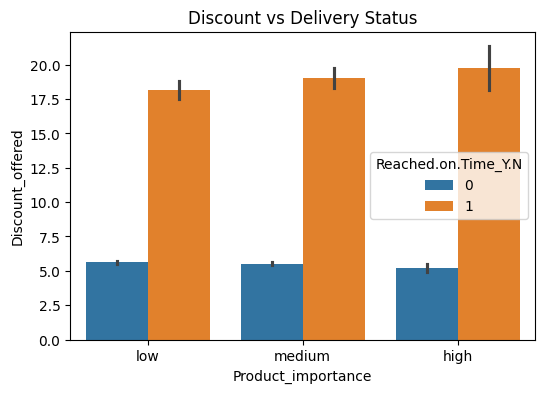

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x='Product_importance',
            y='Discount_offered',
            hue='Reached.on.Time_Y.N',
            data=df)
plt.title("Discount vs Delivery Status")
plt.show()

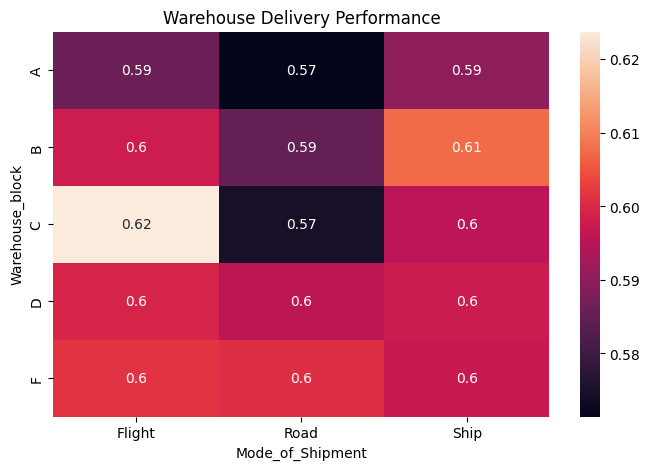

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(df.pivot_table(values='Reached.on.Time_Y.N',
                           index='Warehouse_block',
                           columns='Mode_of_Shipment',
                           aggfunc='mean'),
            annot=True)
plt.title("Warehouse Delivery Performance")
plt.show()